In [ ]:
# !pip install pandas-datareader
# import pandas_datareader as pdr

In [69]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math
# from sklearn import  sklearn

In [20]:
start = dt.datetime(2010, 1, 29)
end = dt.datetime.today()
df = web.DataReader('^SPX', 'stooq')

df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-17,2609.28,2645.06,2606.36,2635.96,2.095706e+09
2019-01-16,2614.75,2625.76,2612.68,2616.10,2.146539e+09
2019-01-15,2585.10,2613.08,2585.10,2610.30,1.984628e+09
2019-01-14,2580.31,2589.32,2570.41,2582.61,2.035806e+09
2019-01-11,2588.11,2596.27,2577.40,2596.26,1.908050e+09


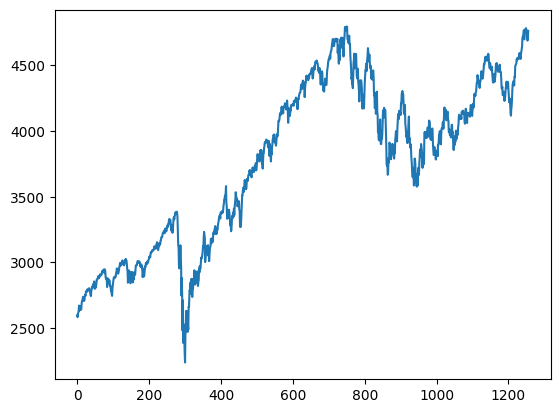

In [59]:
testprices = np.array(df["Close"])[-1:0:-1]
plt.plot(testprices)

In [181]:
def k_days_back(vals, k):
    vals1 = vals[0:-k]
    vals2 = vals[k:]
    ds = 100 * (vals2-vals1) / vals1
    return ds

def ks_days_back(vals, ks):
    m = max(ks)
    ds_1 = k_days_back(vals, 1)
    y = ds_1[m:]
    n = y.shape[0]
    ds_0 = np.array([0]*n).reshape(-1,1)

    for k in ks:
        ds_k = k_days_back(testprices, k)
        ds_k = ds_k[(m-k):-1].reshape(-1,1)
        ds_0 = np.concatenate((ds_0, ds_k), axis=1)

    return n, ds_0, y

n, X, y = ks_days_back(testprices, [1,2,3,4,5,6,7,20])

1255
1255

1255
1255

1254
1254

1253
1253

1252
1252

1251
1251

1250
1250

1249
1249

1236
1236



In [178]:
split_i = math.ceil(0.8*n)
X_train = X[0:split_i]
y_train = y[0:split_i]
X_test = X[split_i:]
y_test = y[split_i:]
X_train

array([[ 0.        ,  0.07090418,  0.13857837, ...,  0.12081891,
         0.21079102,  4.37321378],
       [ 0.        ,  1.28902502,  1.36084317, ...,  0.72884211,
         1.41140131,  6.27737057],
       [ 0.        ,  0.30239769,  1.59532069, ...,  0.55995909,
         1.0334438 ,  5.46795388],
       ...,
       [ 0.        , -0.07676351,  2.20556183, ...,  1.11215604,
         2.87770735, -1.80193818],
       [ 0.        ,  0.69782559,  0.62052641, ...,  2.07709337,
         1.81774254, -0.38455869],
       [ 0.        ,  1.28493972,  1.99173195, ...,  3.80399253,
         3.38872249, -0.52498897]])

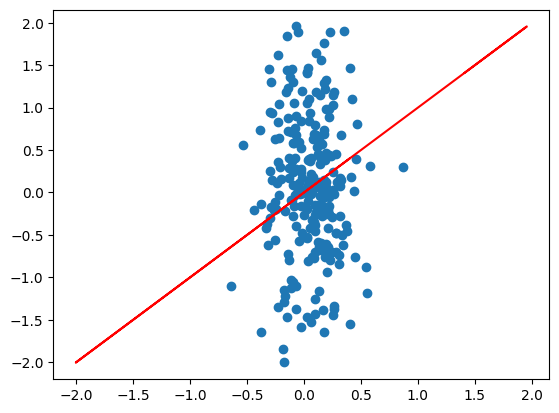

In [158]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test, color = 'red')
plt.show()

In [159]:
A = reg.coef_
b = reg.intercept_
A,b

(array([ 0.        , -0.25860228,  0.10719555,  0.06251789, -0.08796898,
         0.13508609, -0.25096121,  0.14168365, -0.00327351]),
 0.05617128015188744)

In [183]:
tp = np.dot((1 * (y_pred>0.06)), (1 * (y_test>0.06)))
tn = np.dot((1 * (y_pred<0.06)), (1 * (y_test<0.06)))
n_test = y_test.shape[0]
print(tp, tn, ((tp+tn)/n_test))
reg.score(X_test, y_test)

59 55 0.46153846153846156


-0.08185228769331787

In [190]:
1.0006 ** 250

testprices[split_i]/testprices[0]

1.1617819822663502

In [184]:
import statsmodels.api as sm
ols = sm.OLS(y_train, X_train)
ols_result = ols.fit()
ols_result.summary()

C:\Users\miraj\Desktop\projects\fin\venv\lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.100
Model:                            OLS   Adj. R-squared (uncentered):              0.093
Method:                 Least Squares   F-statistic:                              13.67
Date:                Wed, 10 Jan 2024   Prob (F-statistic):                    6.45e-19
Time:                        16:15:37   Log-Likelihood:                         -1716.7
No. Observations:                 988   AIC:                                      3449.
Df Residuals:                     980   BIC:                                      3489.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1            -0.2586      0.041     -6.357      0.000      -0.338      -0.179
x2             0.1073      0.042      2.576      0.010       0.026       0.189
x3             0.0626      0.042      1.506      0.132      -0.019       0.144
x4            -0.0881      0.042     -2.106      0.035      -0.170      -0.006
x5             0.1352      0.042      3.222      0.001       0.053       0.218
x6            -0.2512      0.042     -6.051      0.000      -0.333      -0.170
x7             0.1417      0.033      4.291      0.000       0.077       0.207
x8            -0.0017      0.009     -0.177      0.860      -0.020       0.017
==============================================================================
Omnibus:                      223.001   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2324.140
Skew:                          -0.715   Prob(JB):                         0.00
Kurtosis:                      10.376   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [110]:
x = [3, 6, 4, 2, 8, 1, 7, 2, 9]
x[0:-3]

# 36 64 42 28 81 17 72 29 d1[0]
# 64 42 28 81 17 72 29 d1[1]
# 32 68 41 27 82 19 d3[0]
# 28 81 17 72 29 d1[3]

[3, 6, 4, 2, 8, 1]